In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\91852\Documents\Python Practice\Datasets\Telco Churn Train.csv")
df.sample(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2058,WA,118,510,No,No,0,113.0,80,19.21,150.1,87,12.76,204.3,115,9.19,10.8,4,2.92,2,False
982,TX,87,415,No,No,0,169.1,105,28.75,169.9,102,14.44,244.9,106,11.02,9.9,10,2.67,3,False
1008,SC,109,415,No,Yes,46,217.5,123,36.98,233.7,84,19.86,163.9,99,7.38,9.0,3,2.43,4,False
1866,CT,135,415,Yes,No,0,186.0,107,31.62,66.0,94,5.61,213.1,105,9.59,12.9,4,3.48,1,False
941,VT,48,510,No,No,0,188.4,63,32.03,165.9,89,14.10,205.7,71,9.26,13.2,2,3.56,1,False


In [5]:
df['State'].nunique()

51

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [8]:
df.shape

(2666, 20)

In [7]:
# Dropping unnecessary columns
df1 = df.drop(columns=['State','Account length','Area code'])
df1.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
# Define X and y

X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [18]:
X.head()

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [15]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.shape, X_test.shape

((2132, 16), (534, 16))

In [25]:
# Column Transformer

from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[   
    ('tnf1',OneHotEncoder(sparse_output=False,drop='first'),['International plan','Voice mail plan'])
],remainder='passthrough')

In [26]:
X_train_new = transformer.fit_transform(X_train)

X_test_new = transformer.transform(X_test)


In [27]:
X_train_new.shape

(2132, 16)

In [36]:
X_train_new.dtype

dtype('float64')

In [29]:
# Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(y_train)
le.classes_

array([False,  True])

In [30]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [31]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

In [55]:
dt = DecisionTreeClassifier(max_depth=7)

dt.fit(X_train_new,y_train)

DecisionTreeClassifier(max_depth=7)

In [56]:
y_pred = dt.predict(X_test_new)

In [57]:
# Check accuracy

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("Testing accuracy:", acc)

Testing accuracy: 0.9288389513108615


In [58]:
y_pred_train = dt.predict(X_train_new)

train_acc = accuracy_score(y_train, y_pred_train)

print("Training Accuracy: ", train_acc)

Training Accuracy:  0.9727954971857411


In [65]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_samples=0.7, max_features=0.8)

rf.fit(X_train_new,y_train)

RandomForestClassifier(max_features=0.8, max_samples=0.7, n_estimators=50)

In [66]:
# Check accuracy

y_pred_rf = rf.predict(X_test_new)

acc_rf = accuracy_score(y_test, y_pred_rf)

print("Testing accuracy:", acc_rf)

Testing accuracy: 0.9550561797752809


In [67]:
y_pred_train_rf = rf.predict(X_train_new)

train_acc_rf = accuracy_score(y_train, y_pred_train_rf)

print("Training Accuracy: ", train_acc_rf)

Training Accuracy:  0.9920262664165104


In [68]:
# Grid Search CV

# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [69]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(
                        estimator=rf,
        param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
                        )

In [70]:
rf_grid.fit(X_train_new, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features=0.8, max_samples=0.7,
                                              n_estimators=50),
             n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [71]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.75,
 'n_estimators': 100}

In [72]:
rf_grid.best_score_

0.955918021791954

In [73]:
# Feature Importance

rf.feature_importances_

array([0.08953051, 0.02501887, 0.03481039, 0.14241227, 0.02726134,
       0.1154415 , 0.07418391, 0.02150335, 0.08115539, 0.03662489,
       0.0272622 , 0.02882683, 0.04670045, 0.09069145, 0.05842298,
       0.10015366])

In [74]:
cols = X_train.columns
cols

Index(['International plan', 'Voice mail plan', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

<Axes: >

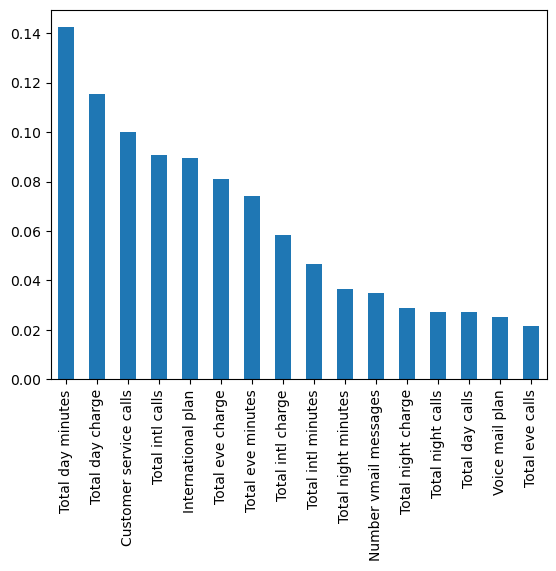

In [75]:
r= pd.Series(np.abs(rf.feature_importances_),index = cols)
r.sort_values(ascending=False).plot(kind='bar')

In [76]:
# Random Forest with Best Parameters

rf1 = RandomForestClassifier(n_estimators=100, max_samples=0.75)

rf1.fit(X_train_new,y_train)

# Check accuracy

y_pred_rf1 = rf1.predict(X_test_new)

acc_rf1 = accuracy_score(y_test, y_pred_rf1)

print("Testing accuracy:", acc_rf1)

Testing accuracy: 0.9550561797752809


In [77]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_new,y_train)

y_pred_lr = lr.predict(X_test_new)

acc_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression training accuracy: ", acc_lr)

Logistic Regression training accuracy:  0.848314606741573


C:\Users\91852\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
# Logistic Regression Tuning

lr1 = LogisticRegression(max_iter = 2000, penalty = 'l2')

lr1.fit(X_train_new,y_train)

y_pred_lr1 = lr1.predict(X_test_new)

acc_lr1 = accuracy_score(y_test, y_pred_lr1)

print("Logistic Regression training accuracy: ", acc_lr1)

Logistic Regression training accuracy:  0.8632958801498127


In [82]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train_new)

X_train_scaled = scaler.transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)

In [84]:
# Logistic Regression Fitting

lr2 = LogisticRegression(max_iter = 2000, penalty = 'l2')

lr2.fit(X_train_scaled,y_train)

y_pred_lr2 = lr2.predict(X_test_scaled)

acc_lr2 = accuracy_score(y_test, y_pred_lr2)

print("Logistic Regression training accuracy: ", acc_lr2)

Logistic Regression training accuracy:  0.8595505617977528


#  Validation with Random Forest

In [86]:
# Validation

val = pd.read_csv(r"C:\Users\91852\Documents\Python Practice\Datasets\Telco Churn Test.csv")

val1 = val.drop(columns=['State','Account length','Area code'])


X_val= val1.iloc[:,:-1]
y_val= val1.iloc[:,-1]



In [87]:
X_val_new = transformer.transform(X_val)

In [88]:
val_pred = rf1.predict(X_val_new)

acc_val = accuracy_score(y_val,val_pred)

print("Validation Accuracy: ", acc_val)

Validation Accuracy:  0.9535232383808095


In [89]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_val,val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val,val_pred))
print("Classification Report:\n", classification_report(y_val,val_pred))

Accuracy: 0.9535232383808095
Confusion Matrix:
 [[569   3]
 [ 28  67]]
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.99      0.97       572
        True       0.96      0.71      0.81        95

    accuracy                           0.95       667
   macro avg       0.96      0.85      0.89       667
weighted avg       0.95      0.95      0.95       667



##  ROC - AUC

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_prob = rf1.predict_proba(X_val_new)[:,1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val,y_prob)
roc_auc = auc(fpr,tpr)

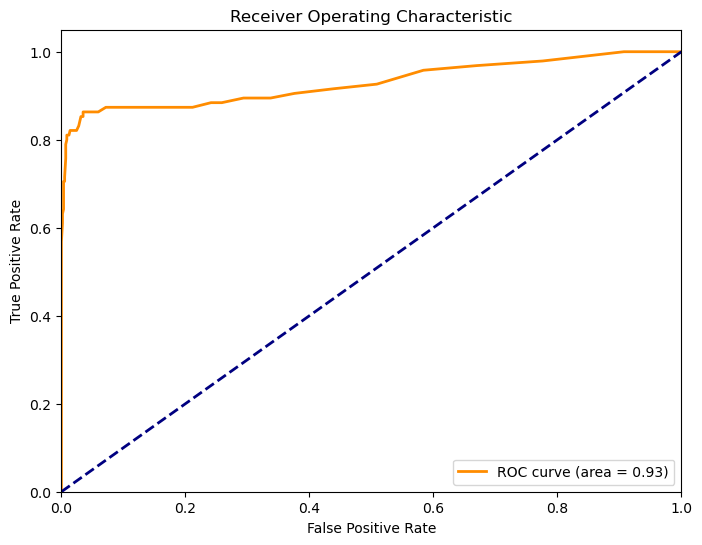

AUC Score: 0.9293706293706294


In [94]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print("AUC Score:", roc_auc_score(y_val,y_prob))

## Gradient Boosting

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=5)

gbc.fit(X_train_new,y_train)

# Check accuracy

y_pred_gb = gbc.predict(X_test_new)

acc_gb = accuracy_score(y_test, y_pred_gb)

print("Testing accuracy:", acc_gb)

Testing accuracy: 0.9569288389513109


In [102]:
# Evaluate model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Accuracy: 0.9569288389513109
Confusion Matrix:
 [[454   1]
 [ 22  57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       455
           1       0.98      0.72      0.83        79

    accuracy                           0.96       534
   macro avg       0.97      0.86      0.90       534
weighted avg       0.96      0.96      0.95       534



In [103]:
# Get the predicted probabilities for the positive class
y_prob_gb = gbc.predict_proba(X_val_new)[:,1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val,y_prob_gb)
roc_auc = auc(fpr,tpr)

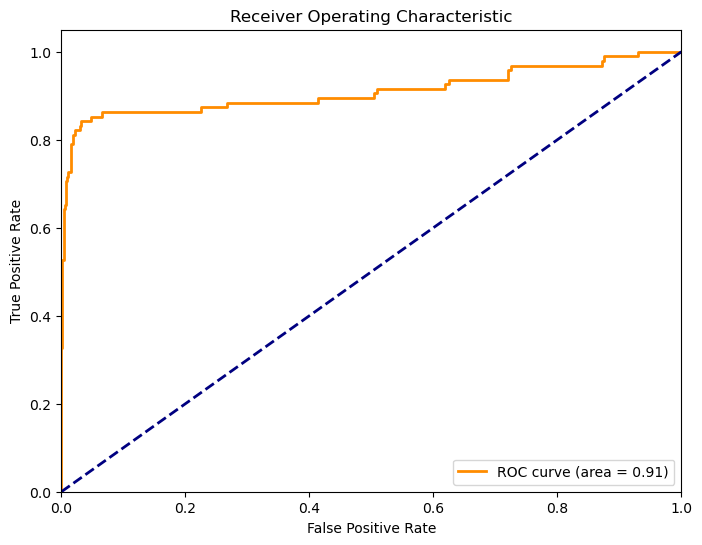

AUC Score: 0.9108575634891425


In [104]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print("AUC Score:", roc_auc_score(y_val,y_prob_gb))

## Stacking

In [113]:
# Prepare Base estimators

from sklearn.neighbors import KNeighborsClassifier

estimators = [
    ('rfs', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('gbdt',GradientBoostingClassifier())
]

In [114]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [115]:
clf.fit(X_train_new,y_train)

StackingClassifier(cv=10,
                   estimators=[('rfs',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [116]:
# Check accuracy

y_pred_s = clf.predict(X_test_new)

acc_st = accuracy_score(y_test, y_pred_s)

print("Testing accuracy:", acc_st)

Testing accuracy: 0.9531835205992509


In [117]:
# Evaluate model performance

print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Accuracy: 0.9569288389513109
Confusion Matrix:
 [[454   1]
 [ 22  57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       455
           1       0.98      0.72      0.83        79

    accuracy                           0.96       534
   macro avg       0.97      0.86      0.90       534
weighted avg       0.96      0.96      0.95       534



In [118]:
# Get the predicted probabilities for the positive class
y_prob_s = clf.predict_proba(X_val_new)[:,1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val,y_prob_s)
roc_auc = auc(fpr,tpr)

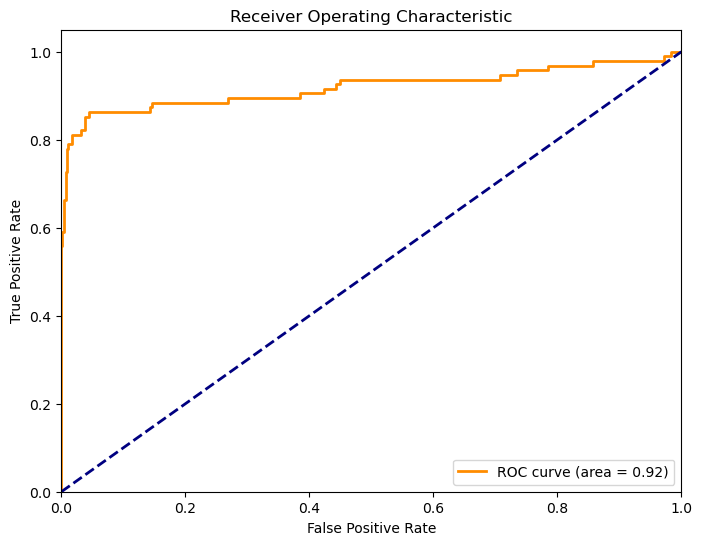

AUC Score: 0.9194884063305115


In [119]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print("AUC Score:", roc_auc_score(y_val,y_prob_s))